In [2]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");

v3.0


v3.0
v1.0


In [7]:
#create parameters
params = []
ϕas = [0.5, 0.3]
ϕps = [0.1, 0.6]
DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ = (1.0, 20.0, 1.0, 100, 0.005, 2.0, 0.5, 0.3, 0.6, 1e-5, 0.1);
T, save_interval, param_name = (19.9, 0.1, "fig_1")
#T, save_interval, param_name = (20.0, 0.01, "fig_1")
map(ϕas, ϕps) do ϕa, ϕp
    param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true)
    push!(params,param)
end

2-element Vector{Vector{Any}}:
 [Dict{String, Any}("T" => 19.9, "save_interval" => 0.1, "δ" => 0.1, "δt" => 1.0e-5, "name" => "fig_1", "save_on" => true, "DT" => 1.0, "Lx" => 2.0, "N" => 100, "DR" => 1.0…), Dict{String, Any}("T" => 19.9, "save_interval" => 0.1, "δ" => 0.1, "δt" => 1.0e-5, "name" => "fig_1", "save_on" => true, "DT" => 1.0, "Lx" => 2.0, "N" => 100, "DR" => 1.0…)]
 [Dict{String, Any}("T" => 19.9, "save_interval" => 0.1, "δ" => 0.1, "δt" => 1.0e-5, "name" => "fig_1", "save_on" => true, "DT" => 1.0, "Lx" => 2.0, "N" => 100, "DR" => 1.0…), Dict{String, Any}("T" => 19.9, "save_interval" => 0.1, "δ" => 0.1, "δt" => 1.0e-5, "name" => "fig_1", "save_on" => true, "DT" => 1.0, "Lx" => 2.0, "N" => 100, "DR" => 1.0…)]

In [8]:
#create images
images  = []
times   = []
fts     = []
ϵ = 0.2
for param in params
    local pde_ts, f_saves, sim_ts, η_saves
    #load saves
        pde_ts, f_saves = load_compress_pde(param)
        sim_ts, η_saves = load_compress_sim(param)
    # create image
        @unpack N, Nx, N₁, N₂ = param
        ft_sim = local_average_timeseries(η_saves, ϵ, N, N₁, N₂)
        t_sim_rgb_image = rho_to_rgb(ft_sim);
        push!(images, t_sim_rgb_image)
        push!(times, sim_ts)
        push!(fts, ft_sim)

        ft_pde = permutedims(reshape(reduce(hcat,f_saves),(Nx,3,:)),(3,1,2))
        t_pde_rgb_image = rho_to_rgb(ft_pde);
        push!(images, t_pde_rgb_image)
        push!(times, pde_ts)
        push!(fts, ft_pde)
end

full load


saved
fast load


full load


saved
fast load


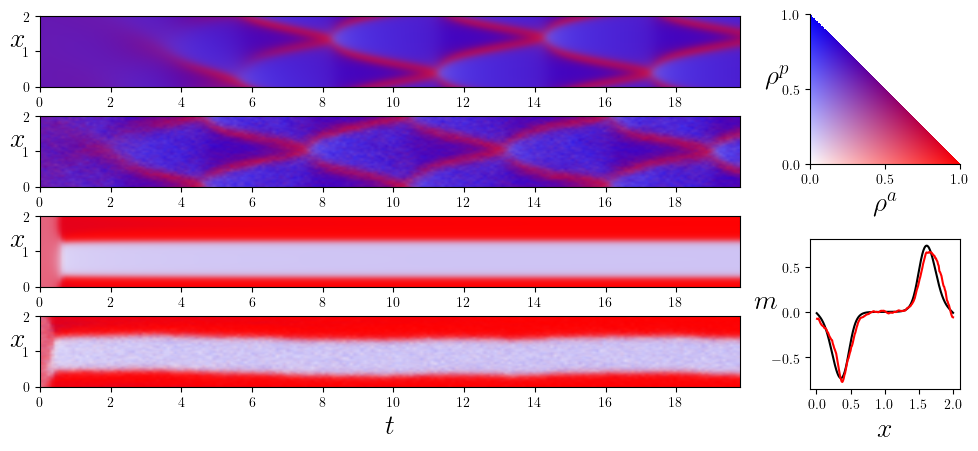

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [23]:
#create plot
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig = plt.figure(figsize=(10,5))
    #fig.add_axes([0,0,1,1],visible=true)
# add image
    for (i,(rgb_image,ts)) in enumerate(zip(images, times ))
        ax = fig.add_axes([0.03, -0.1+0.2*i, 0.7, 0.15])
        t_end = ts[end]
        ax.imshow(rgb_image; extent = [0,t_end,0,Lx], interpolation = "bilinear")
        ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.get_yaxis().set_ticks(0:1.0:Lx)
        if i ==1
            ax.set_xlabel(L"t", fontsize = 20)
        end
        ax.set_ylabel(L"x",fontsize = 20, rotation = 0)
        ax.axis([0,t_end, 0, 2])
        #ax.set_aspect(ts[end]/Lx/4)
    end
# add magnetisation 
    ax = fig.add_axes([0.8, 0.1, 0.15, 0.3])

    sim_mag = fts[1][end,:,2] - fts[1][end,:,1]
    pde_mag = fts[2][end,:,2] - fts[2][end,:,1]

    # sim_mag = fts[3][end,:,2] +fts[3][end,:,1] +fts[3][end,:,3]
    # pde_mag = fts[4][end,:,2] +fts[4][end,:,1] +fts[4][end,:,3]

    # using FindPeaks1D
    # sim_peak, properties = findpeaks1d(-sim_mag; prominence=0.2 )
    # pde_peak, properties = findpeaks1d(-pde_mag; height=0.2)
    
    pde_mag = circshift(pde_mag, 40)#Int64((sim_peak[1]/N/Δx - pde_peak[1]) ÷ 1) )
    sim_mag = circshift(sim_mag, 15)

    ax.plot(Δx:Δx:Lx, pde_mag; color = "black")
    ax.plot((1/N):(1/N):Lx, sim_mag; color = "red")# linestyle = "dashed")
    
    ax.get_xaxis().set_ticks(0:0.5:Lx)
    #ax.get_yaxis().set_ticks(-0.5:0.2:0.5)
    ax.set_xlabel(L"x", fontsize = 20)
    ax.set_ylabel(L"m",fontsize = 20, rotation = 0)
# add colour bars
    cbar_ax = fig.add_axes([0.8, 0.55, 0.15, 0.3])

    Δ = 0.001
    cbar_f = [ x*(x+y≤ 1)*(i != 3)/2 + y*(x+y≤ 1)*(i == 3) for x in Δ:Δ:1, y in Δ:Δ:1, i in 1:3 ]  
    rgb_image = rho_to_rgb(cbar_f );

    ax = cbar_ax
    ax.imshow(rgb_image; extent = [0,1,0,1])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.get_xaxis().set_ticks(0:0.5:1)
    ax.get_yaxis().set_ticks(0:0.5:1)
    ax.set_xlabel(L"\rho^a", fontsize = 20)
    ax.set_ylabel(L"\rho^p",fontsize = 20, rotation = 0)
#
display(fig)
fig_name = "sim_plot"
    pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
    mkpath(pathname)
    filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/fig_1.pdf";
    PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)
